# Natural Language Processing - Text Summarization example

###### Links: [News Summary Dataset (Kaggle)](https://www.kaggle.com/pariza/bbc-news-summary)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [22]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [23]:
# Read files txt
import os

folder = "data_summary/full_articles/"
full_articles = []
for file in os.listdir(folder):
    txt = open(folder+file, "r")
    full_articles.append(' '.join([i.strip() for i in txt.readlines()]))
    
print("len:", len(full_articles))

len: 500


In [24]:
folder = "data_summary/summaries/"
summaries = []
for file in os.listdir(folder):
    txt = open(folder+file, "r")
    summaries.append(' '.join([i.strip() for i in txt.readlines()]))

print("len:", len(summaries))

len: 500


In [25]:
# Create dataframe
dtf = pd.DataFrame({"text":full_articles, "y":summaries})
dtf.head()

,text,y
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...


In [26]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   y       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [27]:
# check
i = 5
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Japan narrowly escapes recession  Japan's economy teetered on the brink of a technical recession in the three months to September, figures show.  Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.  The government was keen to play down the worrying implications of the data. "I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It's painting a picture of a recovery... much patchier than previously thought,"

### 1 - Text Analysis

- Text cleaning
- Length analysis
- Word frequency

###### Text cleaning

In [34]:
# Insert space between sentences and strip
dtf = add_preprocessed_text(dtf, column="text")
dtf = add_preprocessed_text(dtf, column="y")
dtf.head()

,text,y,text_clean,y_clean
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ...",High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...


In [142]:
# check
i = 5
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
Japan narrowly escapes recession Japan's economy teetered on the brink of a technical recession in the three months to September, figures show. Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth. The government was keen to play down the worrying implications of the data. "I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It's painting a picture of a recovery... much patchier than previously thought," sa

###### Word frequency

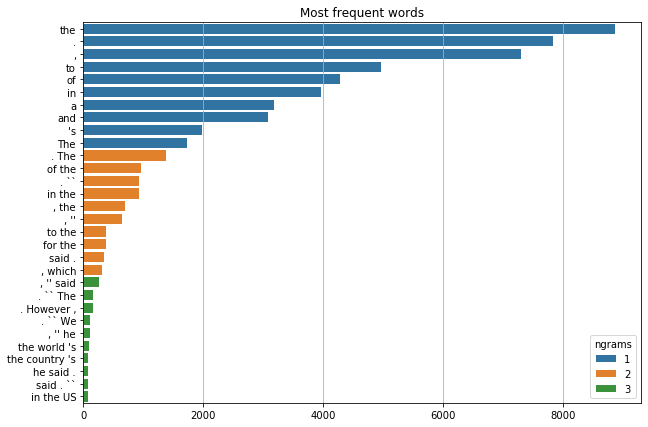

In [9]:
words = word_freq(corpus=dtf["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))

###### Length analysis

In [10]:
X = add_text_length(dtf, "text_clean")

                           min         mean         max
char_count           698.00000  1660.816000  4529.00000
word_count           157.00000   377.222000  1039.00000
sentence_count         6.00000    15.712000    48.00000
avg_word_length        3.85514     4.408661     5.25969
avg_sentence_lenght   17.25000    24.053503    32.75000


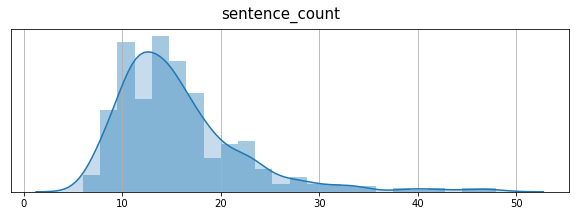

In [11]:
plot_distributions(X, x="sentence_count", figsize=(10,3))

In [12]:
y = add_text_length(dtf, "y_clean")

                            min        mean          max
char_count           204.000000  729.448000  2082.000000
word_count            50.000000  166.352000   489.000000
sentence_count         3.000000    6.666000    20.000000
avg_word_length        3.461538    4.394635     5.347826
avg_sentence_lenght   12.500000   24.823073    40.400000


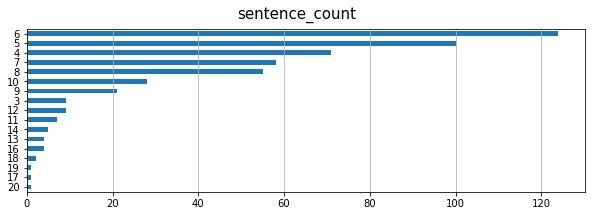

In [13]:
plot_distributions(y, x="sentence_count", figsize=(10,3))

min     0.277778
mean    0.442338
max     0.603175
Name: ratio, dtype: float64


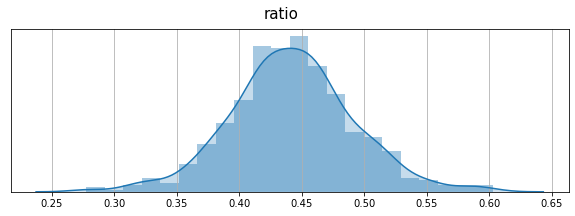

In [201]:
# Ratio summary / text
y["ratio"] = y["word_count"] / X["word_count"]
print(y["ratio"].describe().T[["min","mean","max"]])
plot_distributions(y, x="ratio", figsize=(10,3))

In [30]:
ratio = 0.45

###### Summary

In [15]:
dtf = dtf[["text","text_clean","y_clean"]]
dtf.head()

,text,text_clean,y_clean
0,Ad sales boost Time Warner profit Quarterly p...,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...


### 2 - Preprocessing

### 3 - Baseline (Extractive: TextRank)

In [107]:
# Train/Test
predicted = textrank(corpus=dtf["text_clean"], ratio=ratio)

In [108]:
# Evaluate
evaluate_summary(list(dtf["y_clean"].values), predicted)

rouge1: 0.72 | rouge2: 0.64 | rougeL: 0.64 --> Avg rouge: 0.69


In [145]:
# Explainability
i = 5
match = display_string_matching(dtf["text_clean"].iloc[i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Deep Learning)

In [ ]:
latent_dim = 200
embedding_dim=110

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)



# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

In [ ]:
predicted

### 5 - Model (Abstractive: Language model)

In [212]:
def bart(corpus, ratio=0.2):
    nlp = transformers.pipeline("summarization")
    lst_summaries = [nlp(txt, max_length=int(len(txt.split())*ratio), 
                              min_length=int(len(txt.split())*ratio)
                        )[0]["summary_text"].replace(" .", ".")
                     for txt in corpus]
    return lst_summaries

In [213]:
# Train/Test (this takes a while)
predicted = bart(corpus=dtf["text"], ratio=ratio)

All model checkpoint weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
Your max_length is set to 1000, but you input_length is only 596. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 1000, but you input_length is only 498. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


KeyboardInterrupt: 

In [ ]:
# Evaluate
evaluate_summary(dtf["y_clean"].values, predicted)

In [209]:
# Explainability
i = 5
match = display_string_matching(dtf["text_clean"].iloc[i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Summary"])

from IPython.core.display import display, HTML
display(HTML(match))